In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import os
from scipy.interpolate import interp1d

In [23]:
df2 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\IRdata\scaled_frequencies\CNpy_scaled_output.txt',
    skiprows=1,
    sep='\s+',
    names=["Wavenumber", "Intensity"])

wavenumber_list = df2["Wavenumber"].tolist()
h_ev = 4.135667696e-15  # eV*s
c_cm = 2.99792458e10    # cm/s

zero_point_energy = 0.5 * sum([h_ev * c_cm * wn for wn in wavenumber_list])  # in eV
print("Zero-point energy (eV):", zero_point_energy)

Zero-point energy (eV): 5.450178350231323


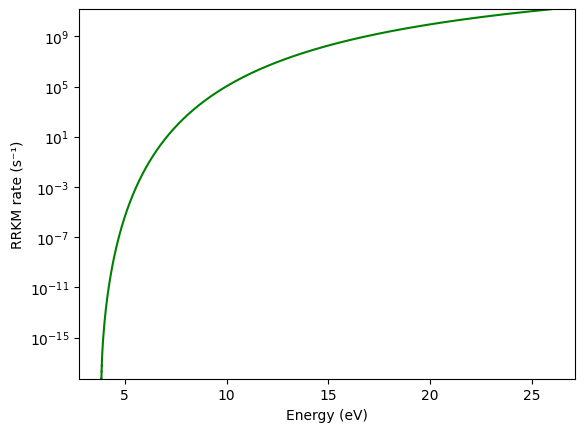

In [24]:
# DENSUM OUTPUT DATA
df1 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\2-cyanopyrene\vibs\densum.out',
    skiprows=139,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

df2 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\TS-2-cyanopyrene\vibs\densum.out',
    skiprows=138,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

# CONSTANTS & PARAMETERS
h_wavenumber = 4.135667696e-15 * 8065.56 # Planck's constant in eV/cm^-1
E0_cm = 31052                            # Activation energy in cm^-1 (rounded to cm_grain)
cm_to_eV = 1.239841984e-4                
cm_grain = 10

# LISTS
density_of_states_list = df1["Density"].tolist()
TS_sum_of_states_list = df2["Sum"].tolist()
energies_list = df1["E-Emin"].tolist()
N_k_RRKM_list = []
filtered_energies_list = []

# FUNCTIONS
def RRKM_dissociation_rate(reaction_degen, TS_sum_of_states, density_of_states):
    return (reaction_degen * TS_sum_of_states) / (h_wavenumber * density_of_states)

# CALCULATIONS
for energy, density in zip(energies_list, density_of_states_list):
    if energy <= E0_cm:
        # print("Energy below threshold:", energy)
        continue

    E_available = energy - E0_cm
    # print("E_available:", E_available)
    index = int(E_available / cm_grain)
    # print("Index:", index)

    TS_sum_val = TS_sum_of_states_list[index]
    #print("sum of states:", TS_sum_val, "and density of states:", density)
    k = RRKM_dissociation_rate(reaction_degen=1, TS_sum_of_states=TS_sum_val, density_of_states=density)
    N_k_RRKM_list.append(k)
    filtered_energies_list.append(energy)

# Converts energies from cm^-1 to eV
N_RRKM_filtered_energies_list_eV = [e * cm_to_eV for e in filtered_energies_list]

# OPTIONAL PLOTTING
plt.plot(N_RRKM_filtered_energies_list_eV, N_k_RRKM_list, color='green')
plt.xlabel('Energy (eV)')
plt.ylabel('RRKM rate (s⁻¹)')
plt.yscale('log')
plt.ylim(min(N_k_RRKM_list), max(N_k_RRKM_list))
plt.savefig(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots\Ncyp_RRKM.png')

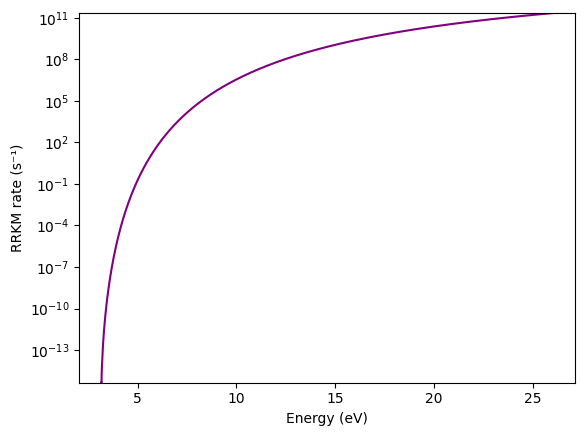

In [25]:

# DENSUM OUTPUT DATA
df1 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\C-2-cyanopyrene\vibs\densum.out',
    skiprows=139,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

df2 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\TS-C-2-cyanopyrene\vibs\densum.out',
    skiprows=138,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

# CONSTANTS & PARAMETERS
h_wavenumber = 4.135667696e-15 * 8065.56
E0_cm = 25490                           
cm_to_eV = 1.239841984e-4                
cm_grain = 10

# LISTS
density_of_states_list = df1["Density"].tolist()
TS_sum_of_states_list = df2["Sum"].tolist()
energies_list = df1["E-Emin"].tolist()
C_k_RRKM_list = []
filtered_energies_list = []

# FUNCTIONS
def RRKM_dissociation_rate(reaction_degen, TS_sum_of_states, density_of_states):
    return (reaction_degen * TS_sum_of_states) / (h_wavenumber * density_of_states)

# CALCULATIONS
for energy, density in zip(energies_list, density_of_states_list):
    if energy <= E0_cm:
        continue

    E_available = energy - E0_cm
    index = int(E_available / cm_grain)

    TS_sum_val = TS_sum_of_states_list[index]
    k = RRKM_dissociation_rate(reaction_degen=1, TS_sum_of_states=TS_sum_val, density_of_states=density)
    C_k_RRKM_list.append(k)
    filtered_energies_list.append(energy)

C_RRKM_filtered_energies_list_eV = [e * cm_to_eV for e in filtered_energies_list]

# OPTIONAL PLOTTING
plt.plot(C_RRKM_filtered_energies_list_eV, C_k_RRKM_list, color='purple')
plt.xlabel('Energy (eV)')
plt.ylabel('RRKM rate (s⁻¹)')
plt.yscale('log')
plt.ylim(min(C_k_RRKM_list), max(C_k_RRKM_list))
plt.savefig(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots\Ccyp_RRKM.png')

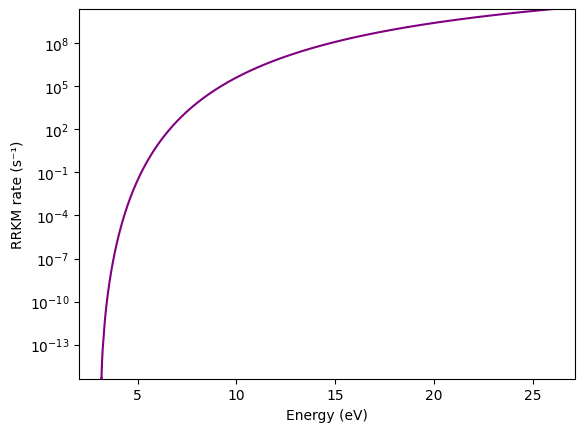

In [26]:

# DENSUM OUTPUT DATA
df1 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\C-2-cyanopyrene\vibs\densum.out',
    skiprows=139,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

df2 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\other-TS-C-2-cyanopyrene\vibs\densum.out',
    skiprows=138,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

# CONSTANTS & PARAMETERS
h_wavenumber = 4.135667696e-15 * 8065.56
E0_cm = 25490                           
cm_to_eV = 1.239841984e-4                
cm_grain = 10

# LISTS
density_of_states_list = df1["Density"].tolist()
TS_sum_of_states_list = df2["Sum"].tolist()
energies_list = df1["E-Emin"].tolist()
other_C_k_RRKM_list = []
filtered_energies_list = []

# FUNCTIONS
def RRKM_dissociation_rate(reaction_degen, TS_sum_of_states, density_of_states):
    return (reaction_degen * TS_sum_of_states) / (h_wavenumber * density_of_states)

# CALCULATIONS
for energy, density in zip(energies_list, density_of_states_list):
    if energy <= E0_cm:
        continue

    E_available = energy - E0_cm
    index = int(E_available / cm_grain)

    TS_sum_val = TS_sum_of_states_list[index]
    k = RRKM_dissociation_rate(reaction_degen=1, TS_sum_of_states=TS_sum_val, density_of_states=density)
    other_C_k_RRKM_list.append(k)
    filtered_energies_list.append(energy)

other_C_RRKM_filtered_energies_list_eV = [e * cm_to_eV for e in filtered_energies_list]

# OPTIONAL PLOTTING
plt.plot(other_C_RRKM_filtered_energies_list_eV, other_C_k_RRKM_list, color='purple')
plt.xlabel('Energy (eV)')
plt.ylabel('RRKM rate (s⁻¹)')
plt.yscale('log')
plt.ylim(min(other_C_k_RRKM_list), max(other_C_k_RRKM_list))
plt.savefig(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots\other_Ccyp_RRKM.png')

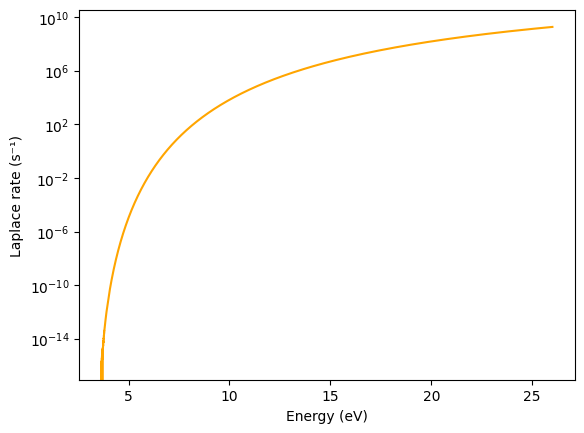

In [27]:
# INVERSE LAPLACE DISSOCIATON RATE

# DOS DATA
df = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\2-cyanopyrene\vibs\densum.out',
    skiprows=139,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

# CONSTANTS & PARAMETERS
T_eff = 1000
h = 6.62607015e-34 
k_B = 1.380649e-23 
E0_cm = 29520                        
cm_to_eV = 1.239841984e-4
cm_grain = 10

# LISTS
Ncyp_k_Laplace_list = []
filtered_energies_list = []
energies_list = df["E-Emin"]
density_of_states_list1 = df["Density"].tolist()
density_of_states_list2 = df["Density"].tolist()

# FUNCTIONS
def pre_exponential_factor_1000K(T_eff):
    A_diss_1000K = k_B * T_eff / h
    return A_diss_1000K

def Laplace_dissociation_rate(A_diss_1000K, DOS_E_Ea, DOS_E):
    k_diss_laplace = (A_diss_1000K * DOS_E_Ea) / DOS_E
    return k_diss_laplace
    
# CALCULATIONS
for energy, unchanged_DOS in zip(energies_list, density_of_states_list2):
    if energy <= E0_cm:
        continue

    E_available = energy - E0_cm
    index = int(E_available / cm_grain)

    changed_DOS = density_of_states_list1[index]
    k = Laplace_dissociation_rate(A_diss_1000K=(pre_exponential_factor_1000K(T_eff)), DOS_E_Ea=changed_DOS, DOS_E=unchanged_DOS)
    Ncyp_k_Laplace_list.append(k)
    filtered_energies_list.append(energy)

Ncyp_LP_filtered_energies_list_eV = [e * cm_to_eV for e in filtered_energies_list]

# OPTIONAL PLOTTING
plt.plot(Ncyp_LP_filtered_energies_list_eV, Ncyp_k_Laplace_list, color='orange')
plt.xlabel('Energy (eV)')
plt.ylabel('Laplace rate (s⁻¹)')
plt.yscale('log')
plt.savefig(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots\Ncyp_LP.png')

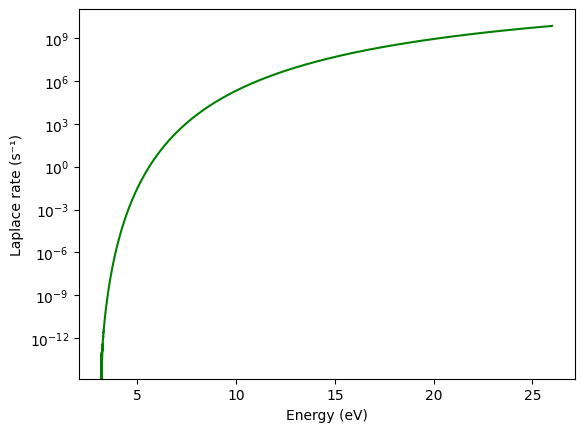

In [28]:
# INVERSE LAPLACE DISSOCIATON RATE

# DOS DATA
df = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\C-2-cyanopyrene\vibs\densum.out',
    skiprows=139,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

# CONSTANTS & PARAMETERS
T_eff = 1000
h = 6.62607015e-34 
k_B = 1.380649e-23 
E0_cm = 25490                           
cm_to_eV = 1.239841984e-4
cm_grain = 10

# LISTS
Ccyp_k_Laplace_list = []
filtered_energies_list = []
energies_list = df["E-Emin"]
density_of_states_list1 = df["Density"].tolist()
density_of_states_list2 = df["Density"].tolist()

# FUNCTIONS
def pre_exponential_factor_1000K(T_eff):
    A_diss_1000K = k_B * T_eff / h
    return A_diss_1000K

def Laplace_dissociation_rate(A_diss_1000K, DOS_E_Ea, DOS_E):
    k_diss_laplace = (A_diss_1000K * DOS_E_Ea) / DOS_E
    return k_diss_laplace
    
# CALCULATIONS
for energy, unchanged_DOS in zip(energies_list, density_of_states_list2):
    if energy <= E0_cm:
        continue

    E_available = energy - E0_cm
    index = int(E_available / cm_grain)

    changed_DOS = density_of_states_list1[index]
    k = Laplace_dissociation_rate(A_diss_1000K=(pre_exponential_factor_1000K(T_eff)), DOS_E_Ea=changed_DOS, DOS_E=unchanged_DOS)
    Ccyp_k_Laplace_list.append(k)
    filtered_energies_list.append(energy)

Ccyp_LP_filtered_energies_list_eV = [e * cm_to_eV for e in filtered_energies_list]

# OPTIONAL PLOTTING
plt.plot(Ccyp_LP_filtered_energies_list_eV, Ccyp_k_Laplace_list, color='green')
plt.xlabel('Energy (eV)')
plt.ylabel('Laplace rate (s⁻¹)')
plt.yscale('log')
plt.savefig(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots\Ccyp_LP.png')

C:\Users\Mustafa\AppData\Local\Temp\ipykernel_19704\137240724.py:60: RuntimeWarning: invalid value encountered in scalar divide
  k_IR = (A_IR * DOS_mode_s) / density_of_states_list[idx]


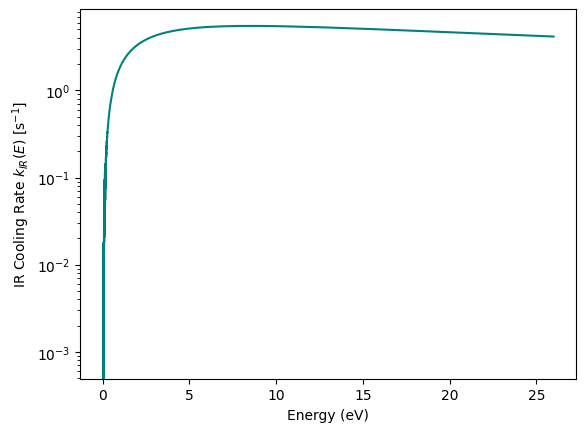

<Figure size 640x480 with 0 Axes>

In [29]:
# THE INFRARED RADIATIVE VIBRATIONAL COOLING RATE 

# WAVENUMBER-INTENSITY & DENSUM DATA
df1 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\2-cyanopyrene\vibs\densum.out',
    skiprows=139,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

df2 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\IRdata\scaled_frequencies\CNpy_scaled_output.txt',
    skiprows=1,
    sep='\s+',
    names=["Wavenumber", "Intensity"])

mode_i_path = r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\2-cyanopyrene\vibs\densum_mode_sweeps\mode_{i}\densum.out'
density_mode = {}

for i in range(1, 76):  # Vib modes 1 to 75
    path = mode_i_path.format(i=i)
    if os.path.exists(path):
        df_i = pd.read_csv(path, skiprows=138, sep='\s+', names=["No.", "E-Emin", "Density", "Sum"])
        density_mode[i] = df_i["Density"].values

# LISTS
A_IR_list = []
energy_s_list = []
DOS_list = []
filtered_energies_list = []
wavenumber_list = df2["Wavenumber"].tolist()
intensity_list = df2["Intensity"].tolist()
energies_list = df1["E-Emin"].tolist()
density_of_states_list = df1["Density"].tolist()
N_k_IR_total = np.zeros_like(density_of_states_list) 
DOS_mode_s_dict = {}  # Dictionary to store DOS_mode_s values for each mode

# FUNCTIONS
def einstein_coefficient(wavenumber, intensity):
    A = (1.2512 * 10**(-7)) * (wavenumber ** 2) * intensity
    return A

# CALCULATIONS
for wavenumber, intensity in zip(wavenumber_list, intensity_list):
    A_IR = einstein_coefficient(wavenumber, intensity)
    A_IR_list.append(A_IR)

for mode in range(1, 52):
    wavenumber_s = wavenumber_list[mode - 1]
    rounded_wavenumber = round(wavenumber_s / 10) * 10
    A_IR = A_IR_list[mode - 1]
    # rho_minus_i = density_mode[mode]

    for idx, e in enumerate(energies_list):
        if e <= rounded_wavenumber:
            continue
        E_available = e - rounded_wavenumber
        index = int(E_available / cm_grain)

        DOS_mode_s = density_mode[mode][index]
        k_IR = (A_IR * DOS_mode_s) / density_of_states_list[idx]
        N_k_IR_total[idx] += k_IR

N_IR_energies_list_eV = [e * cm_to_eV for e in energies_list]

# OPTIONAL PLOTTING
plt.plot(N_IR_energies_list_eV, N_k_IR_total, color='teal')
plt.xlabel("Energy (eV)")
plt.ylabel("IR Cooling Rate $k_{IR}(E)$ [s$^{-1}$]")
plt.yscale('log')
plt.show()
plt.savefig(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots\Ncyp_IR.png')

C:\Users\Mustafa\AppData\Local\Temp\ipykernel_19704\460017072.py:60: RuntimeWarning: invalid value encountered in scalar divide
  k_IR = (A_IR * DOS_mode_s) / density_of_states_list[idx]


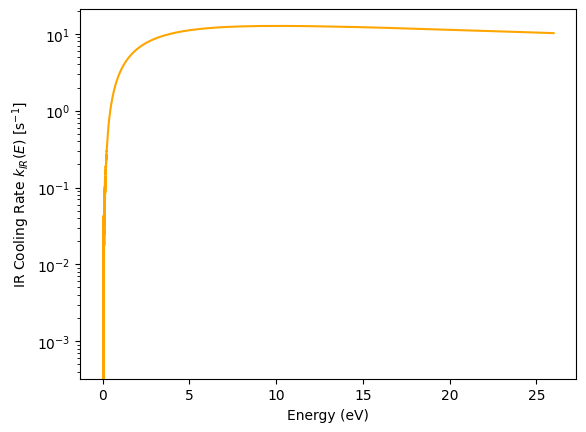

<Figure size 640x480 with 0 Axes>

In [30]:
# THE INFRARED RADIATIVE VIBRATIONAL COOLING RATE 

# WAVENUMBER-INTENSITY & DENSUM DATA
df1 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\C-2-cyanopyrene\vibs\densum.out',
    skiprows=139,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

df2 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\IRdata\scaled_frequencies\CNpy+_scaled_output.txt',
    skiprows=1,
    sep='\s+',
    names=["Wavenumber", "Intensity"])

mode_i_path = r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\C-2-cyanopyrene\vibs\densum_mode_sweeps\mode_{i}\densum.out'
density_mode = {}

for i in range(1, 76):  # Vib modes 1 to 75
    path = mode_i_path.format(i=i)
    if os.path.exists(path):
        df_i = pd.read_csv(path, skiprows=138, sep='\s+', names=["No.", "E-Emin", "Density", "Sum"])
        density_mode[i] = df_i["Density"].values

# LISTS
A_IR_list = []
energy_s_list = []
DOS_list = []
filtered_energies_list = []
wavenumber_list = df2["Wavenumber"].tolist()
intensity_list = df2["Intensity"].tolist()
energies_list = df1["E-Emin"].tolist()
density_of_states_list = df1["Density"].tolist()
C_k_IR_total = np.zeros_like(density_of_states_list) 
DOS_mode_s_dict = {}  # Dictionary to store DOS_mode_s values for each mode

# FUNCTIONS
def einstein_coefficient(wavenumber, intensity):
    A = (1.2512 * 10**(-7)) * (wavenumber ** 2) * intensity
    return A

# CALCULATIONS
for wavenumber, intensity in zip(wavenumber_list, intensity_list):
    A_IR = einstein_coefficient(wavenumber, intensity)
    A_IR_list.append(A_IR)

for mode in range(1, 52):
    wavenumber_s = wavenumber_list[mode - 1]
    rounded_wavenumber = round(wavenumber_s / 10) * 10
    A_IR = A_IR_list[mode - 1]
    # rho_minus_i = density_mode[mode]

    for idx, e in enumerate(energies_list):
        if e <= rounded_wavenumber:
            continue
        E_available = e - rounded_wavenumber
        index = int(E_available / cm_grain)

        DOS_mode_s = density_mode[mode][index]
        k_IR = (A_IR * DOS_mode_s) / density_of_states_list[idx]
        C_k_IR_total[idx] += k_IR

C_IR_energies_list_eV = [e * cm_to_eV for e in energies_list]

# OPTIONAL PLOTTING
plt.plot(C_IR_energies_list_eV, C_k_IR_total, color='orange')
plt.xlabel("Energy (eV)")
plt.ylabel("IR Cooling Rate $k_{IR}(E)$ [s$^{-1}$]")
plt.yscale('log')
plt.show()
plt.savefig(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots\Ccyp_IR.png')

Pre-exponential factor for RF: 46538.84718602217 s^-1


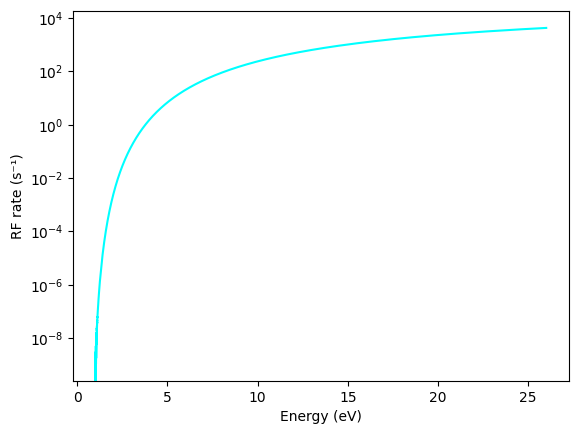

<Figure size 640x480 with 0 Axes>

In [31]:
# Recurrent fluoresence rate

# DOS DATA
df = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\C-2-cyanopyrene\vibs\densum.out',
    skiprows=139,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

# CONSTANTS & PARAMETERS
# Recurrent Fluorescence rate parameters: v_el=1.518 eV with f=0.0008 and v_el=1.963 eV with f=0.0352. 
h_eV = 4.135667696e-15 # Planck's constant in eV/Hz
eps_0 = 8.854e-12   # Vacuum permitivity in C^2 /(N*m^2) or also C^2 /(kg*m^3*s^2)
m_e = 9.109e-31     # Electron mass in kg
e = 1.602e-19       # Elementary charge in C
c = 2.998e8         # Speed of light in m/s
f_osc = 0.0008       # Oscillator strength for RF. 
v_el = 1.158 / h_eV  # Electronic energy for 2-cyanopyrene in eV, converted to Hz using h_eV
wave_v_el = 8070    # cm^-1 for cation 2-cyanopyrene

# LISTS
k_RF_list = []
filtered_energies_list = []
energies_list = df["E-Emin"].tolist()
density_of_states_list1 = df["Density"].tolist()
density_of_states_list2 = df["Density"].tolist()

# FUNCTIONS
def pre_exponential_factor_RF(v_el, f_osc):
    A_RF = (2 * np.pi * (v_el ** 2) * (e **2) * f_osc) / (eps_0 * m_e * c ** 3)
    return A_RF

print("Pre-exponential factor for RF:", pre_exponential_factor_RF(v_el, f_osc), "s^-1")

def RF_dissociation_rate(A_RF, DOS_E_vel, DOS_E):
    k_RF = (A_RF * DOS_E_vel) / DOS_E
    return k_RF

# CALCULATIONS
for energy, unchanged_DOS in zip(energies_list, density_of_states_list2):
    if energy <= wave_v_el:
        continue

    E_available = energy - wave_v_el
    index = int(E_available / cm_grain)

    changed_DOS = density_of_states_list1[index]
    k = RF_dissociation_rate(A_RF=(pre_exponential_factor_RF(v_el, f_osc)), DOS_E_vel=changed_DOS, DOS_E=unchanged_DOS)
    k_RF_list.append(k)
    filtered_energies_list.append(energy)

RF_filtered_energies_list_eV = [e * cm_to_eV for e in filtered_energies_list]

# OPTIONAL PLOTTING
plt.plot(RF_filtered_energies_list_eV, k_RF_list, color='cyan')
plt.xlabel('Energy (eV)')
plt.ylabel('RF rate (s⁻¹)')
plt.yscale('log')
plt.show()
plt.savefig(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots\Ccyp_RF.png')


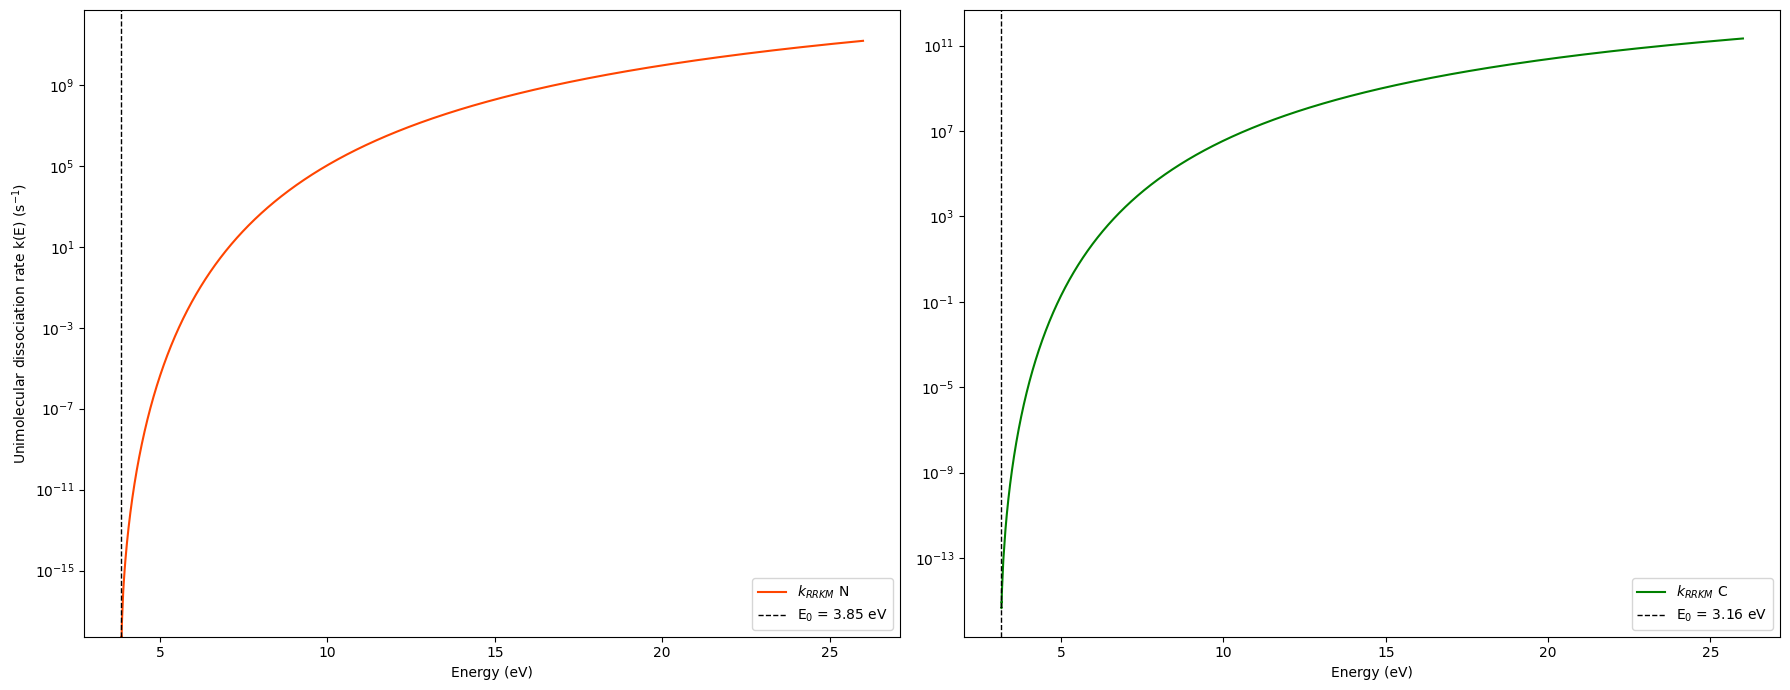

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# NEUTRAL 1-CYANONAPHTHALENE DISSOCIATION RATES
axs[0].plot(N_RRKM_filtered_energies_list_eV, N_k_RRKM_list, label='$k_{RRKM}$ N', color='orangered')
axs[0].axvline(x=3.85, color='black', linestyle='--', linewidth=1, label='E$_0$ = 3.85 eV')
axs[0].set_xlabel('Energy (eV)')
axs[0].set_ylabel('Unimolecular dissociation rate k(E) (s$^{-1}$)')
axs[0].set_yscale('log')
axs[0].legend()
axs[0].set_ylim(N_k_RRKM_list[0], 5e12)

# CATION 1-CYANONAPHTHALENE DISSOCIATION RATES
axs[1].plot(C_RRKM_filtered_energies_list_eV, C_k_RRKM_list, label='$k_{RRKM}$ C', color='green')
axs[1].axvline(x=3.16, color='black', linestyle='--', linewidth=1, label='E$_0$ = 3.16 eV')
axs[1].set_xlabel('Energy (eV)')
axs[1].set_yscale('log')
axs[1].legend()
plt.tight_layout()

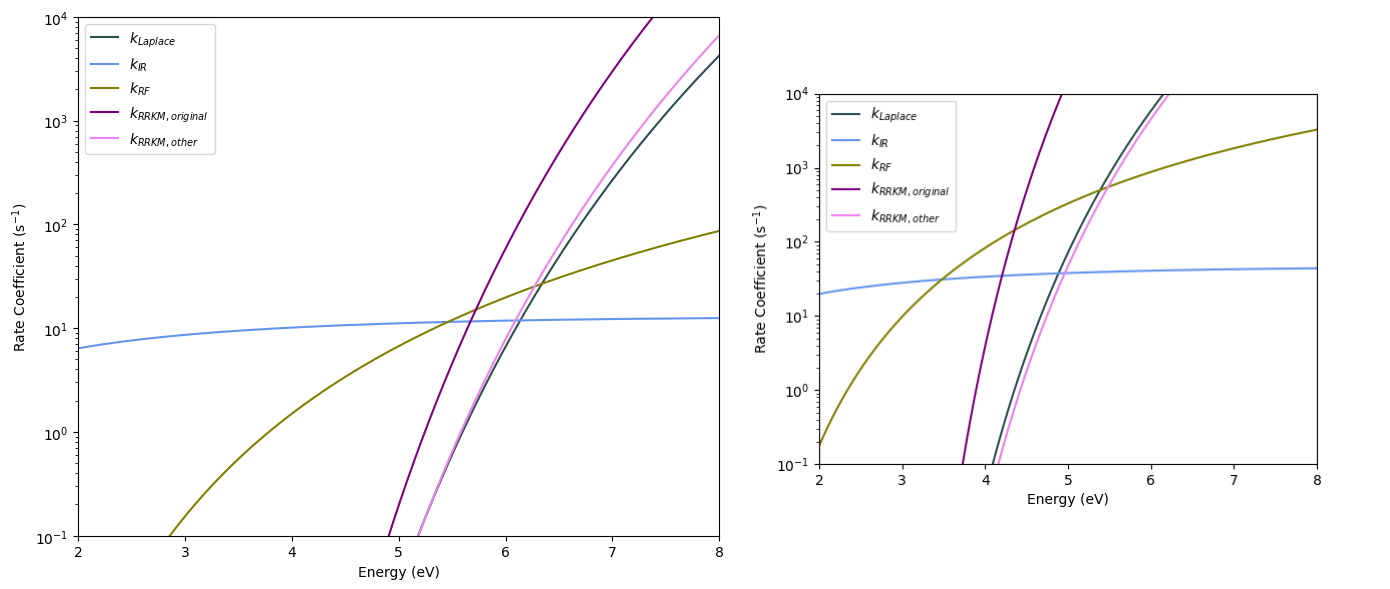

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(Ccyp_LP_filtered_energies_list_eV, Ccyp_k_Laplace_list, color='darkslategrey', label='$k_{Laplace}$')
axs[0].plot(C_IR_energies_list_eV, C_k_IR_total, color='cornflowerblue', label='$k_{IR}$')
axs[0].plot(RF_filtered_energies_list_eV, k_RF_list, color='olive', label='$k_{RF}$')
axs[0].plot(C_RRKM_filtered_energies_list_eV, C_k_RRKM_list, color='purple', label='$k_{RRKM, original}$')
axs[0].plot(other_C_RRKM_filtered_energies_list_eV, other_C_k_RRKM_list, color='violet', label='$k_{RRKM, other}$')
axs[0].set_xlabel('Energy (eV)')
axs[0].set_ylabel('Rate Coefficient (s$^{-1}$)')
axs[0].set_yscale('log')
axs[0].legend(loc='upper left')
axs[0].set_xlim(2, 8)
axs[0].set_ylim(1e-1, 1e4)

img = mpimg.imread('Cation-1cyano-rates.png')
axs[1].imshow(img)
axs[1].axis('off')
plt.tight_layout()

C:\Users\Mustafa\AppData\Local\Temp\ipykernel_19704\3998989299.py:8: RuntimeWarning: invalid value encountered in divide
  C_survival_prob_IR = C_k_IR_total / (C_k_Laplace_interp + C_k_IR_total)
C:\Users\Mustafa\AppData\Local\Temp\ipykernel_19704\3998989299.py:9: RuntimeWarning: invalid value encountered in divide
  C_survival_prob_RF = k_RF_interp / (C_k_Laplace_interp + k_RF_interp)


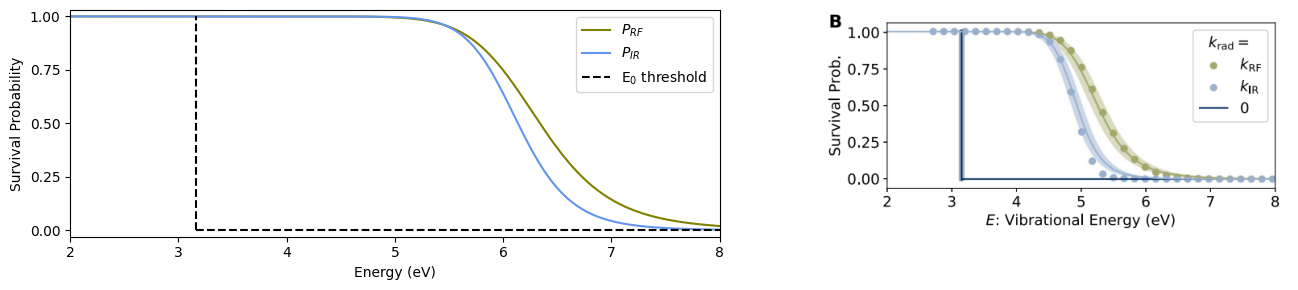

In [34]:
C_threshold_eV = 3.16
interp_laplace = interp1d(Ccyp_LP_filtered_energies_list_eV, Ccyp_k_Laplace_list, bounds_error=False, fill_value="extrapolate")
interp_RF = interp1d(RF_filtered_energies_list_eV, k_RF_list, bounds_error=False, fill_value="extrapolate")

C_k_Laplace_interp = interp_laplace(C_IR_energies_list_eV)
k_RF_interp = interp_RF(C_IR_energies_list_eV)

C_survival_prob_IR = C_k_IR_total / (C_k_Laplace_interp + C_k_IR_total)
C_survival_prob_RF = k_RF_interp / (C_k_Laplace_interp + k_RF_interp)

fig, axs = plt.subplots(1, 2, figsize=(14, 3))

axs[0].plot(C_IR_energies_list_eV, C_survival_prob_RF, color='olive', label='$P_{RF}$')
axs[0].plot(C_IR_energies_list_eV, C_survival_prob_IR, color='cornflowerblue', label='$P_{IR}$')
axs[0].plot([C_threshold_eV, C_threshold_eV], [0, 1], color='black', linestyle='--', label='E$_0$ threshold')
axs[0].plot([C_threshold_eV, 8], [0, 0], color='black', linestyle='--')
axs[0].set_xlabel("Energy (eV)")
axs[0].set_ylabel("Survival Probability")
axs[0].set_yticks(np.arange(0, 1.25, 0.25))
axs[0].set_ylim(-0.03, 1.03)
axs[0].set_xlim(2, 8)
axs[0].legend(loc='upper right')

img = mpimg.imread('PaperplotB.png') 
axs[1].imshow(img)
axs[1].axis('off')

plt.tight_layout()
plt.show()

C:\Users\Mustafa\AppData\Local\Temp\ipykernel_19704\3861869120.py:12: RuntimeWarning: invalid value encountered in divide
  N_survival_prob_IR = N_k_IR_total / (N_k_Laplace_interp + N_k_IR_total)
C:\Users\Mustafa\AppData\Local\Temp\ipykernel_19704\3861869120.py:13: RuntimeWarning: invalid value encountered in divide
  C_survival_prob_IR = C_k_IR_total / (C_k_Laplace_interp + C_k_IR_total)
C:\Users\Mustafa\AppData\Local\Temp\ipykernel_19704\3861869120.py:14: RuntimeWarning: invalid value encountered in divide
  C_survival_prob_RF = k_RF_interp / (C_k_Laplace_interp + k_RF_interp)


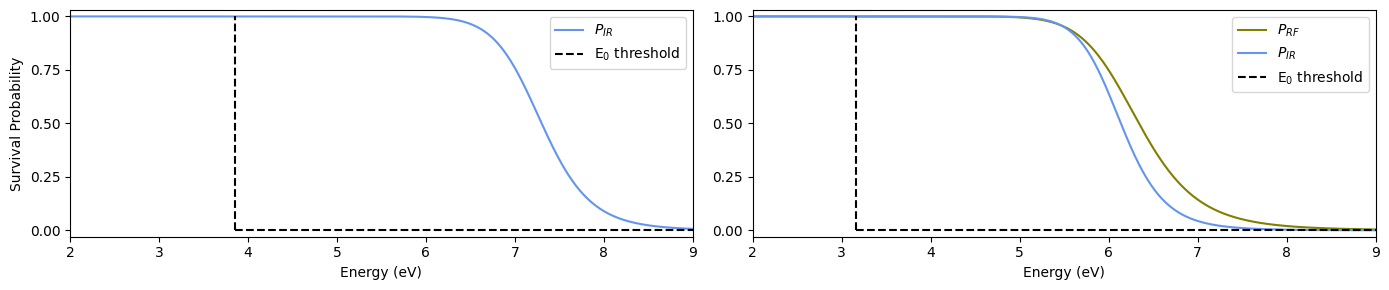

In [35]:
N_threshold_eV = 3.85
C_threshold_eV = 3.16

N_interp_laplace = interp1d(Ncyp_LP_filtered_energies_list_eV, Ncyp_k_Laplace_list, bounds_error=False, fill_value="extrapolate")
interp_laplace = interp1d(Ccyp_LP_filtered_energies_list_eV, Ccyp_k_Laplace_list, bounds_error=False, fill_value="extrapolate")
interp_RF = interp1d(RF_filtered_energies_list_eV, k_RF_list, bounds_error=False, fill_value="extrapolate")

N_k_Laplace_interp = N_interp_laplace(N_IR_energies_list_eV)
C_k_Laplace_interp = interp_laplace(C_IR_energies_list_eV)
k_RF_interp = interp_RF(C_IR_energies_list_eV)

N_survival_prob_IR = N_k_IR_total / (N_k_Laplace_interp + N_k_IR_total)
C_survival_prob_IR = C_k_IR_total / (C_k_Laplace_interp + C_k_IR_total)
C_survival_prob_RF = k_RF_interp / (C_k_Laplace_interp + k_RF_interp)

fig, axs = plt.subplots(1, 2, figsize=(14, 3))

axs[0].plot(N_IR_energies_list_eV, N_survival_prob_IR, color='cornflowerblue', label='$P_{IR}$')
axs[0].plot([N_threshold_eV, N_threshold_eV], [0, 1], color='black', linestyle='--', label='E$_0$ threshold')
axs[0].plot([N_threshold_eV, 9], [0, 0], color='black', linestyle='--')
axs[0].set_xlabel("Energy (eV)")
axs[0].set_ylabel("Survival Probability")
axs[0].set_yticks(np.arange(0, 1.25, 0.25))
axs[0].set_ylim(-0.03, 1.03)
axs[0].set_xlim(2, 9)
axs[0].legend(loc='upper right')

axs[1].plot(C_IR_energies_list_eV, C_survival_prob_RF, color='olive', label='$P_{RF}$')
axs[1].plot(C_IR_energies_list_eV, C_survival_prob_IR, color='cornflowerblue', label='$P_{IR}$')
axs[1].plot([C_threshold_eV, C_threshold_eV], [0, 1], color='black', linestyle='--', label='E$_0$ threshold')
axs[1].plot([C_threshold_eV, 9], [0, 0], color='black', linestyle='--')
axs[1].set_xlabel("Energy (eV)")
axs[1].set_yticks(np.arange(0, 1.25, 0.25))
axs[1].set_ylim(-0.03, 1.03)
axs[1].set_xlim(2, 9)
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

Overall average energy: 8.699053504485057
All molecules destroyed after 37.37 years.


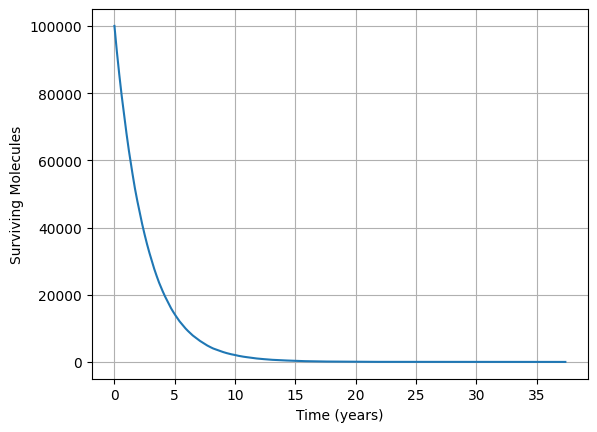

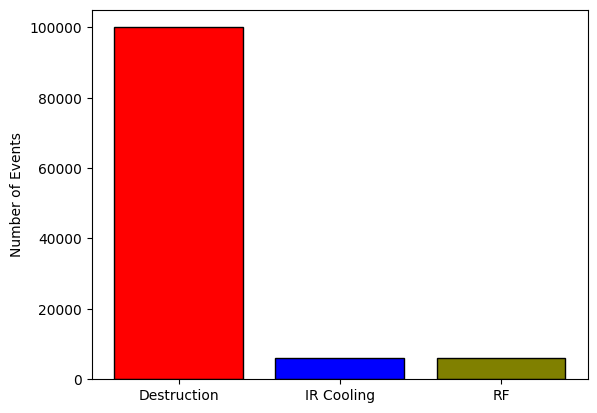

Total number of destructions: 100000
Total number of IR coolings: 6099
Total number of RF coolings: 6148


In [56]:
# MONTE CARLO SIMULATION FOR CATION 1-CYANONAPHTHALENE (VECTORIZED)
# SOURCES:
# https://www.sciencedirect.com/science/article/pii/S0168583X24001575?via%3Dihub
# https://chem.libretexts.org/Courses/Grinnell_College/CHM_364%3A_Physical_Chemistry_2_%28Grinnell_College%29/13%3A_Lasers_Laser_Spectroscopy_and_Photochemistry/13.01%3A_Electronically_Excited_Molecules_can_Relax_by_a_Number_of_Processes

# PARAMETERS FOR MONTE CARLO SIMULATION
num_molecules = 100000
E_min = 5.45  # eV, lower limit
E_max = 13.6   # eV, upper limit
Nc = 17
G0 = 1 # FUV Habing field for the NGC 7023 region 
t_uv = 1.4e9 / (Nc * G0)
dt = 3.1536e7 / 10  # e.g. 1/10th of a year per step, adjust as needed

# LISTS AND ARRAYS
interp_RRKM = interp1d(other_C_RRKM_filtered_energies_list_eV, other_C_k_RRKM_list, bounds_error=False, fill_value=0)
interp_IR = interp1d(C_IR_energies_list_eV, C_k_IR_total, bounds_error=False, fill_value=0)
interp_RF = interp1d(RF_filtered_energies_list_eV, k_RF_list, bounds_error=False, fill_value=0)
molecule_energies = np.random.uniform(E_min, E_max, num_molecules)
molecule_alive = np.ones(num_molecules, dtype=bool)
molecule_excited = np.zeros(num_molecules, dtype=bool)
survival_history = []
time_history = []
total_average = []

# EVENT COUNTERS
rf_count = 0
ir_count = 0
destruction_count = 0

t = 0
current_time = 0.0
while np.any(molecule_alive):
    alive_mask = molecule_alive

    E = molecule_energies[alive_mask]
    idx = np.where(alive_mask)[0]
    was_excited = molecule_excited[idx]

    # RATES
    k_RRKM = interp_RRKM(E)
    k_IR = interp_IR(E) 
    k_RF = interp_RF(E) 
    
    # THRESHOLDS
    k_RRKM[E < other_C_RRKM_filtered_energies_list_eV[0]] = 0
    k_RF[E < RF_filtered_energies_list_eV[0]] = 0
    k_RRKM[~was_excited] = 0
    k_IR[~was_excited] = 0
    k_RF[~was_excited] = 0

    # PROBABILITIES
    p_RRKM = k_RRKM * dt
    p_IR = k_IR * dt
    p_RF = k_RF * dt
    p_FUV_arr = np.full_like(p_RRKM, dt / t_uv)

    # NORMALIZATION
    p_sum = p_RRKM + p_IR + p_RF + p_FUV_arr
    over_one = p_sum > 1
    p_RRKM[over_one] /= p_sum[over_one]
    p_IR[over_one]   /= p_sum[over_one]
    p_RF[over_one]   /= p_sum[over_one]
    p_FUV_arr[over_one] /= p_sum[over_one]

    rand = np.random.rand(np.sum(alive_mask))
    rrkm_mask = rand < p_RRKM
    ir_mask = (rand >= p_RRKM) & (rand < p_RRKM + p_IR)
    rf_mask = (rand >= p_RRKM + p_IR) & (rand < p_RRKM + p_IR + p_RF)
    fuv_mask = (rand >= p_RRKM + p_IR + p_RF) & (rand < p_RRKM + p_IR + p_RF + p_FUV_arr)

    # EVENT COUNTS
    destruction_count += np.sum(rrkm_mask)
    ir_count += np.sum(ir_mask)
    rf_count += np.sum(rf_mask)

    # UPDATE MOLECULE INTERNAL ENERGY
    molecule_alive[idx[rrkm_mask]] = False

    molecule_energies[idx[ir_mask]] = E_min
    molecule_energies[idx[rf_mask]] = E_min

    E_FUV_GAIN = np.random.uniform(0.5, 13.6, size=np.sum(fuv_mask))
    molecule_energies[idx[fuv_mask]] = np.minimum(E[fuv_mask] + E_FUV_GAIN, E_max)
    molecule_excited[idx[fuv_mask]] = True 

    # APPEND HISTORIES
    survival_history.append(np.sum(molecule_alive))
    time_history.append(current_time)
    avg_energy = np.mean(molecule_energies[molecule_alive]) if np.any(molecule_alive) else 0
    total_average.append(avg_energy)

    current_time += dt
    t += 1

# FINAL AVERAGE ENERGY
overall_avg_energy = np.mean(total_average)
print("Overall average energy:", overall_avg_energy)

# TIME TO ZERO MOLECULES
years_to_zero = time_history[-1] / 3.15576e7
print(f"All molecules destroyed after {years_to_zero:.2f} years.")

# PLOTS
plt.plot(np.array(time_history) / 3.15576e7, survival_history)
plt.xlabel('Time (years)')
plt.ylabel('Surviving Molecules')
plt.grid(True)
plt.show()

event_labels = ['Destruction', 'IR Cooling', 'RF']
event_counts = [destruction_count, ir_count, rf_count]
plt.bar(event_labels, event_counts, color=['red', 'blue', 'olive'], edgecolor='black')
plt.ylabel('Number of Events')
plt.show()

print("Total number of destructions:", destruction_count)
print("Total number of IR coolings:", ir_count) 
print("Total number of RF coolings:", rf_count)

Average energy over 1000 runs: 5.6283 eV
Average years to zero molecules over 1000 runs: 8.89 years
Standard deviation of years to zero molecules over 1000 runs: 2.91 years
Variance of years to zero molecules over 1000 runs: 8.47 years
Maximum difference in years to zero molecules over 1000 runs: 20.29 years


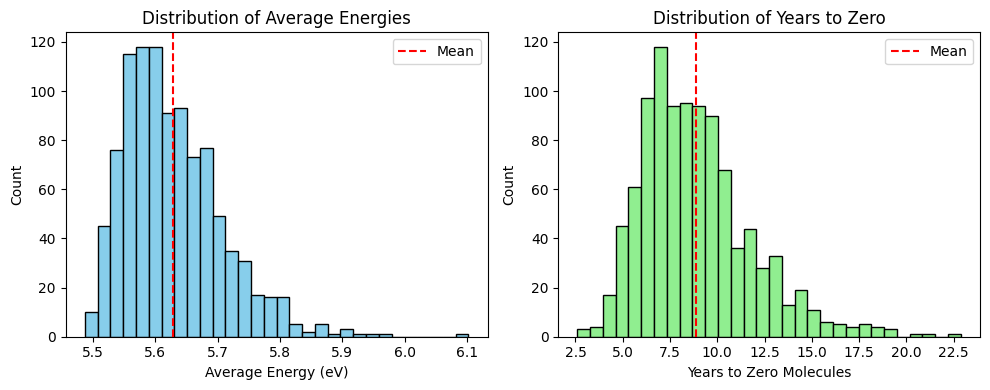

In [72]:
# MULTIPLE MONTE CARLO SIMULATION FOR CATION 1-CYANONAPHTHALENE

n = 1000  # Number of Monte Carlo runs
num_molecules = 10000
E_min = 5.45  # eV, lower limit
E_max = 13.6   # eV, upper limit
Nc = 17
G0 = 47000000 # FUV Habing field for the NGC 7023 region 
t_uv = 1.4e9 / (Nc * G0)
dt = 3.1536e7 / 10  # e.g. 1/10th of a year per step

interp_RRKM = interp1d(other_C_RRKM_filtered_energies_list_eV, other_C_k_RRKM_list, bounds_error=False, fill_value=0)
interp_IR = interp1d(C_IR_energies_list_eV, C_k_IR_total, bounds_error=False, fill_value=0)
interp_RF = interp1d(RF_filtered_energies_list_eV, k_RF_list, bounds_error=False, fill_value=0)

all_avg_energies = []
all_years_to_zero = []

for run in range(n):
    molecule_energies = np.random.uniform(E_min, E_max, num_molecules)
    molecule_alive = np.ones(num_molecules, dtype=bool)
    molecule_excited = np.zeros(num_molecules, dtype=bool)
    total_average = []
    time_history = []
    t = 0
    current_time = 0.0

    while np.any(molecule_alive):
        alive_mask = molecule_alive
        E = molecule_energies[alive_mask]
        idx = np.where(alive_mask)[0]
        was_excited = molecule_excited[idx]

        k_RRKM = interp_RRKM(E)
        k_IR = interp_IR(E) 
        k_RF = interp_RF(E) 

        k_RRKM[E < other_C_RRKM_filtered_energies_list_eV[0]] = 0
        k_RF[E < RF_filtered_energies_list_eV[0]] = 0
        k_RRKM[~was_excited] = 0
        k_IR[~was_excited] = 0
        k_RF[~was_excited] = 0

        p_RRKM = k_RRKM * dt
        p_IR = k_IR * dt
        p_RF = k_RF * dt
        p_FUV_arr = np.full_like(p_RRKM, dt / t_uv)

        p_sum = p_RRKM + p_IR + p_RF + p_FUV_arr
        over_one = p_sum > 1
        p_RRKM[over_one] /= p_sum[over_one]
        p_IR[over_one]   /= p_sum[over_one]
        p_RF[over_one]   /= p_sum[over_one]
        p_FUV_arr[over_one] /= p_sum[over_one]

        rand = np.random.rand(np.sum(alive_mask))
        rrkm_mask = rand < p_RRKM
        ir_mask = (rand >= p_RRKM) & (rand < p_RRKM + p_IR)
        rf_mask = (rand >= p_RRKM + p_IR) & (rand < p_RRKM + p_IR + p_RF)
        fuv_mask = (rand >= p_RRKM + p_IR + p_RF) & (rand < p_RRKM + p_IR + p_RF + p_FUV_arr)

        molecule_alive[idx[rrkm_mask]] = False
        molecule_energies[idx[ir_mask]] = E_min
        molecule_energies[idx[rf_mask]] = E_min

        E_FUV_GAIN = np.random.uniform(0.5, 13.6, size=np.sum(fuv_mask))
        molecule_energies[idx[fuv_mask]] = np.minimum(E[fuv_mask] + E_FUV_GAIN, E_max)
        molecule_excited[idx[fuv_mask]] = True 

        time_history.append(current_time)
        avg_energy = np.mean(molecule_energies[molecule_alive]) if np.any(molecule_alive) else 0
        total_average.append(avg_energy)

        current_time += dt
        t += 1

    # STORE AVERAGES
    all_avg_energies.append(np.mean(total_average))
    all_years_to_zero.append(time_history[-1] / 3.15576e7)

# CALCULATE & PRINT AVERAGES
overall_avg_energy = np.mean(all_avg_energies)
overall_avg_years_to_zero = np.mean(all_years_to_zero)
overall_std_years_to_zero = np.std(all_years_to_zero)
overall_var_years_to_zero = np.var(all_years_to_zero)
max_difference_years_to_zero = np.max(all_years_to_zero) - np.min(all_years_to_zero)
print(f"Average energy over {n} runs: {overall_avg_energy:.4f} eV")
print(f"Average years to zero molecules over {n} runs: {overall_avg_years_to_zero:.2f} years")
print(f"Standard deviation of years to zero molecules over {n} runs: {overall_std_years_to_zero:.2f} years")
print(f"Variance of years to zero molecules over {n} runs: {overall_var_years_to_zero:.2f} years")
print(f"Maximum difference in years to zero molecules over {n} runs: {max_difference_years_to_zero:.2f} years")

# SAVE RESULTS TO CSV
results_dict = {
    "n_simulations": n,
    "num_molecules": num_molecules,
    "G0": G0,
    "overall_avg_years_to_zero": overall_avg_years_to_zero,
    "overall_std_years_to_zero": overall_std_years_to_zero,
    "overall_avg_energy": overall_avg_energy
    }

tsv_path = r"C:\Users\Mustafa\Documents\GitHub\Project-Cynap\runs\cyanopyrene+_simulation_results.tsv"
write_header = not os.path.exists(tsv_path)
results_df = pd.DataFrame([results_dict])
results_df.to_csv(tsv_path, mode='a', header=write_header, index=False, sep='\t')

# HISTOGRAM PLOTS AVG ENERGY AND YEARS TO ZERO
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(all_avg_energies, bins=30, color='skyblue', edgecolor='black')
plt.axvline(overall_avg_energy, color='red', linestyle='--', label='Mean')
plt.xlabel('Average Energy (eV)')
plt.ylabel('Count')
plt.title('Distribution of Average Energies')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(all_years_to_zero, bins=30, color='lightgreen', edgecolor='black')
plt.axvline(overall_avg_years_to_zero, color='red', linestyle='--', label='Mean')
plt.xlabel('Years to Zero Molecules')
plt.ylabel('Count')
plt.title('Distribution of Years to Zero')
plt.legend()

plt.tight_layout()
plt.show()